In [4]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..'))) # To import keras_squeezenet.
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

In [5]:
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
img = image.load_img('../images/cat.jpeg', target_size=(227, 227))

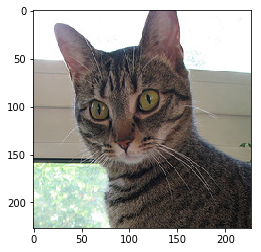

In [46]:
# Let's check out this nice lookin' cat!
plt.imshow(img)

In [47]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

<h1>Randomly initialized weights</h1>
<p>The weights should look random, and it should not be able to predict the correct class.</p>

In [56]:
# Get weights that are not trained (i.e., randomly initialized)
model = SqueezeNet(weights=None)

(3, 3, 3, 64)


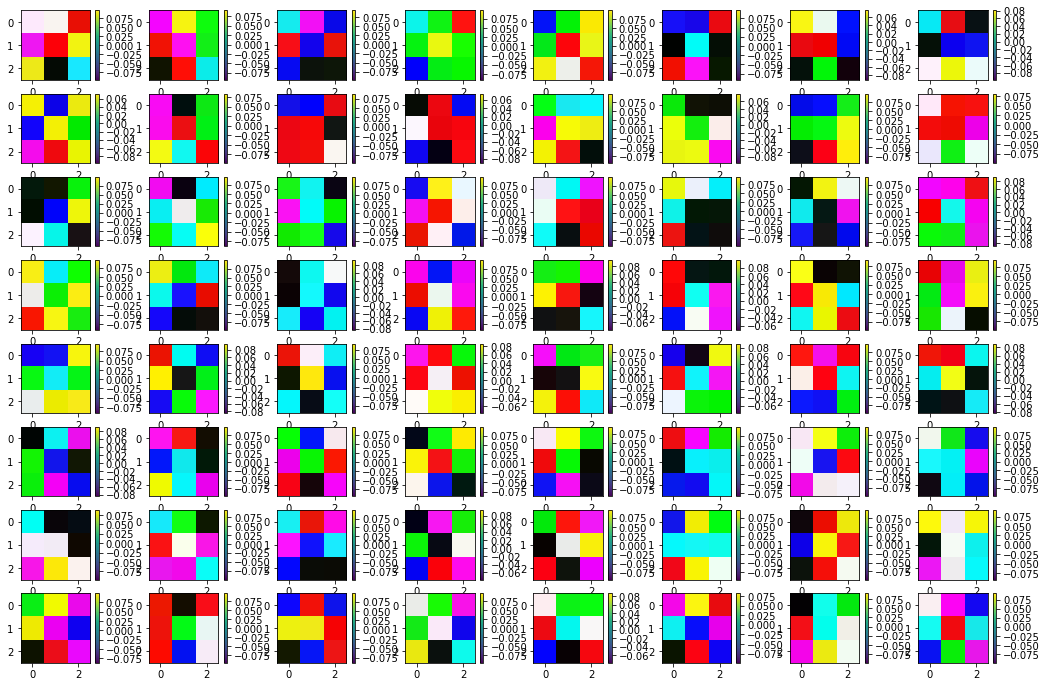

In [57]:
W = K.eval(model.weights[0])
print(W.shape)
plt.figure(figsize=(18,12))
for idx in range(W.shape[-1]):
    plt.subplot(8,8,idx+1)
    plt.imshow(W[:,:,:,idx]); plt.colorbar()

In [60]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# These predictions should look random (since the network is not trained)!

('Predicted:', [[(u'n02110185', u'Siberian_husky', 0.0010239105), (u'n01910747', u'jellyfish', 0.0010204196), (u'n02486410', u'baboon', 0.0010175246), (u'n02643566', u'lionfish', 0.0010172399), (u'n02093754', u'Border_terrier', 0.0010149083)]])


<h1>Weights pretrained over ImageNet</h1>
<p>Check to make sure we can get the pretrained weights. The weights should have some structure, and the classification should be pretty good, since the model is already trained.</p>

In [21]:
# Get weights that are trained over ImageNet.
model = SqueezeNet(weights='imagenet')

(3, 3, 3, 64)


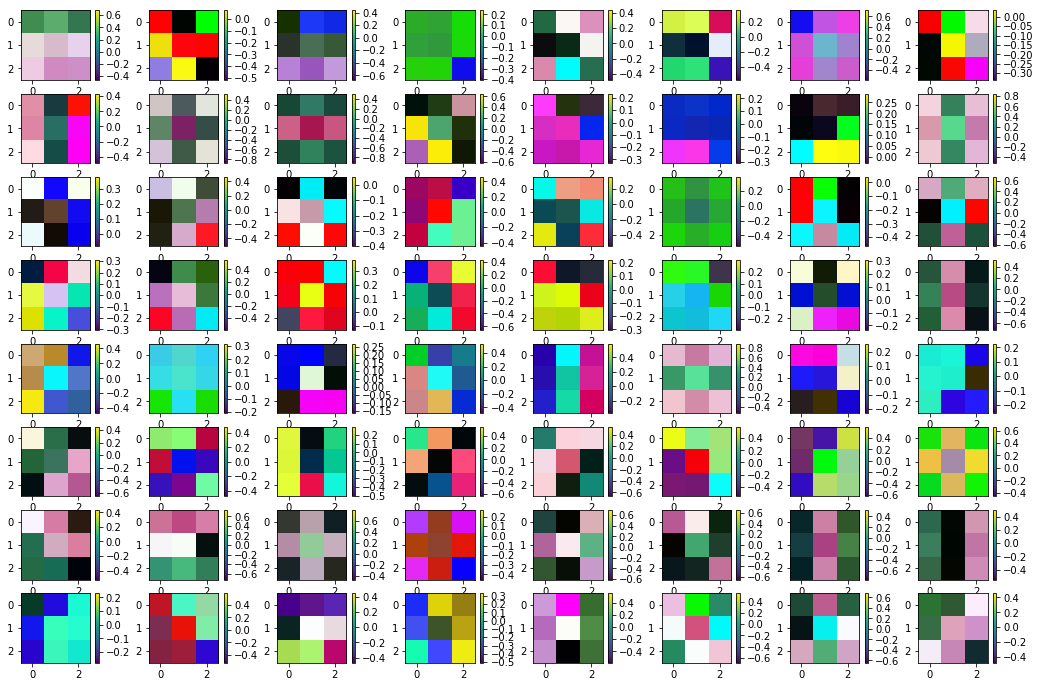

In [52]:
W = K.eval(model.weights[0])
print(W.shape)
plt.figure(figsize=(18,12))
for idx in range(W.shape[-1]):
    plt.subplot(8,8,idx+1)
    plt.imshow(W[:,:,:,idx]); plt.colorbar()

In [62]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# Alright! These look good!

('Predicted:', [[(u'n02123045', u'tabby', 0.82134342), (u'n02124075', u'Egyptian_cat', 0.12180641), (u'n02123159', u'tiger_cat', 0.05682119), (u'n02127052', u'lynx', 2.2597995e-05), (u'n02129604', u'tiger', 5.1768461e-06)]])


<h1>Weights for no_top</h1>
<p>Here we will save the weights for when include_top is False. We'll do this by popping off the last few layers to get the layers we want.</p>

In [22]:
# This is the full model layers.
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 227, 227, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 113, 113, 64)  1792                                         
____________________________________________________________________________________________________
relu_conv1 (Activation)          (None, 113, 113, 64)  0                                            
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 56, 56, 64)    0                                            
___________________________________________________________________________________________

In [24]:
# We don't want to use the last layer, so we'll pop() off the 1) loss, 2) pooling, 3) relu, 4) conv10, 5) dropout layers.
num_layers_to_pop = 5
for idx in range(num_layers_to_pop):
    print(model.layers.pop())

In [25]:
model.layers.pop()

In [26]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 227, 227, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 113, 113, 64)  1792                                         
____________________________________________________________________________________________________
relu_conv1 (Activation)          (None, 113, 113, 64)  0                                            
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 56, 56, 64)    0                                            
___________________________________________________________________________________________

In [29]:
model.save_weights('../weights/squeezenet_weights_tf_dim_ordering_tf_kernels_notop.h5')

<h1>include_top Checks</h1>
<p>Check if include_top flag now works</p>

In [37]:
from keras.utils import get_file

In [43]:
model = SqueezeNet(include_top=False, weights='imagenet')

In [49]:
out = model.predict(x)

In [50]:
print(out.shape)

(1, 13, 13, 512)


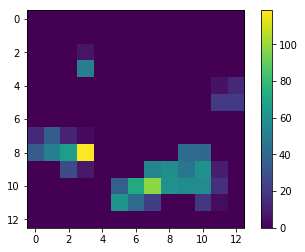

In [57]:
plt.imshow(np.squeeze(out[0,:,:,102])); plt.colorbar()

In [61]:
model = SqueezeNet(include_top=False, weights='imagenet', pooling='avg')

In [62]:
out = model.predict(x)
print(out.shape)

(1, 512)
